## Analise exploratoria com dataset para predição de diabetes

In [1]:
! pip3 install pandas -q

! pip3 install seaborn -q

! pip3 install scikit-learn -q

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn. neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
#Esse comando conta quantas pessoas têm cada idade no seu conjunto de dados,
#Significa que:
#72 pessoas têm 22 anos
#63 pessoas têm 21 anos
#48 pessoas têm 25 anos
#E assim por diante.

df['Age'].value_counts()

In [ ]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'Age']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Diabetes')
    plt.show()


In [ ]:
sns.violinplot(x='Outcome', y='Age', data=df, palette='pastel')
plt.title('Distribuição da Idade por Diabetes')
plt.show()

#Revela como pacientes mais velhos têm mais chance de ter diabetes, mas com sobreposição significativa.

In [ ]:
df_dados = df.copy()

# Transformando as variavveis object

lb = LabelEncoder()

for variavel in ['Outcome']:
    df_dados[variavel] = lb.fit_transform(df_dados[variavel])

df_dados

/var/folders/f6/nmbqlry94lz57zhy760mwcr00000gn/T/ipykernel_36526/508952990.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


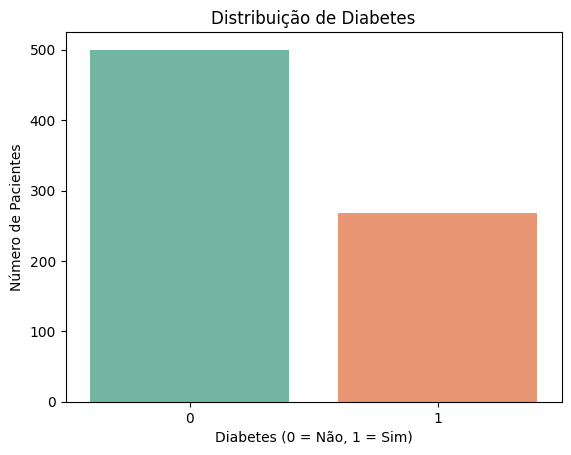

In [ ]:
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribuição de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pacientes')
plt.show()
#Mostra se os dados estão balanceados

In [ ]:
df_dados.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


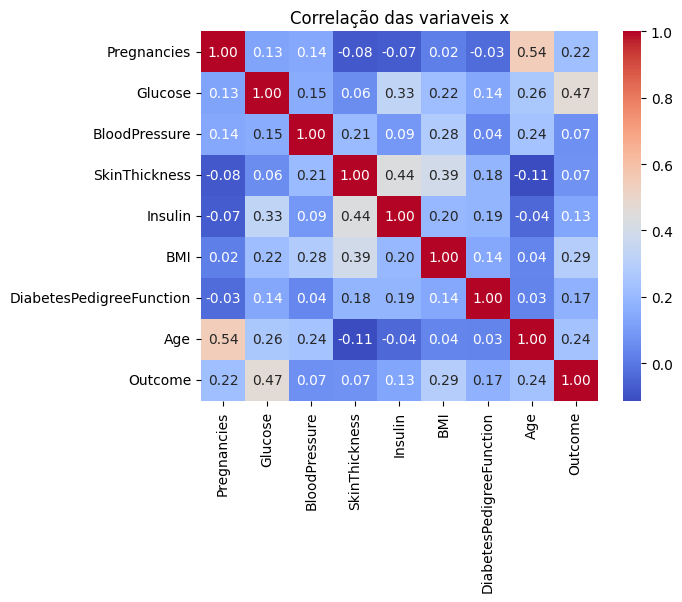

In [ ]:
sns.heatmap(df_dados.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação das variaveis x')
plt.show()

In [ ]:
correlacao_com_alvo = df_dados.corr(numeric_only=True)['Outcome'].sort_values(ascending=False)

display(correlacao_com_alvo)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Preparando os dados para o treinamento
 Devemos separar os dados preditivos da variavel alvo
 
 Tambem separarmos 70% dos dados e 30% para validação

In [ ]:
# Separando preditoras do target

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

target = 'Outcome'

In [ ]:
# Dividir entre features (X) e target (y)
X = df[features]
y = df[target]

In [ ]:
#tratar valores 0 como ausentes
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
X[cols_with_zeros] = X[cols_with_zeros].replace(0, pd.NA)

/var/folders/f6/nmbqlry94lz57zhy760mwcr00000gn/T/ipykernel_36526/2066059263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_with_zeros] = X[cols_with_zeros].replace(0, pd.NA)


In [ ]:
X = X.fillna(X.mean())

/var/folders/f6/nmbqlry94lz57zhy760mwcr00000gn/T/ipykernel_36526/44732401.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(X.mean())


In [ ]:
# Separando dados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

